#### Import all libraries

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

#### Build the model

In [6]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3,3), 
                 input_shape=(64,64,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=8, kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [7]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 29, 29, 8)         1160      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 8)        0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1568)              0         
                                                                 
 dense_1 (Dense)             (None, 16)               

In [8]:
from keras.preprocessing.image import ImageDataGenerator

In [12]:
train_datagen = ImageDataGenerator(rescale = 1/255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [13]:
test_datagen = ImageDataGenerator(rescale = 1/255)

In [14]:
train = train_datagen.flow_from_directory('dataset/training_set',
                                          target_size = (64, 64),
                                          class_mode = 'binary')

Found 13 images belonging to 2 classes.


In [17]:
test = test_datagen.flow_from_directory('dataset/test_set',
                                          target_size = (64, 64),
                                          class_mode = 'binary')

Found 6 images belonging to 2 classes.


In [18]:
train

In [20]:
model.compile(optimizer = 'adam', 
                   loss = 'binary_crossentropy', 
                   metrics = ['accuracy'])

In [23]:
model.fit(train, epochs = 20, validation_data = test)

Epoch 1/20
1/1 [==============================] - 0s 183ms/step - loss: 0.0147 - accuracy: 1.0000 - val_loss: 0.0057 - val_accuracy: 1.0000
Epoch 2/20
1/1 [==============================] - 0s 136ms/step - loss: 0.0130 - accuracy: 1.0000 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 3/20
1/1 [==============================] - 0s 135ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 4/20
1/1 [==============================] - 0s 133ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 5/20
1/1 [==============================] - 0s 135ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 6/20
1/1 [==============================] - 0s 143ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 7/20
1/1 [==============================] - 0s 139ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 8/20
1/1 [====

In [25]:
import matplotlib.pyplot as plt

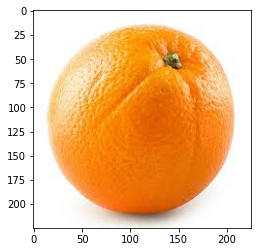

In [26]:
new = plt.imread('dataset/sample1.jpg')
plt.imshow(new)

In [56]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('dataset/sample2.jpg', 
                            target_size = (64, 64))

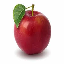

In [57]:
test_image

In [58]:
test_image = image.img_to_array(test_image)

In [45]:
test_image.shape

(64, 64, 3)

In [46]:
test_image = np.expand_dims(test_image, axis = 0)

In [47]:
test_image.shape

(1, 64, 64, 3)

In [48]:
train.class_indices

{'apple': 0, 'orange': 1}

In [49]:
model.predict(test_image)[0][0]

1/1 [==============================] - 0s 23ms/step


0.0

In [53]:
a.shape

(50000, 32, 32, 3)

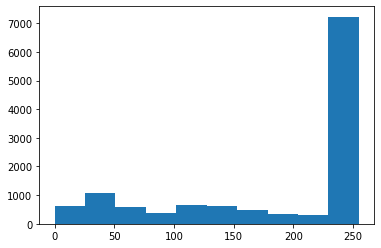

In [61]:
plt.hist(test_image.reshape(64*64*3));

In [62]:
import seaborn as sns

<AxesSubplot:ylabel='Density'>

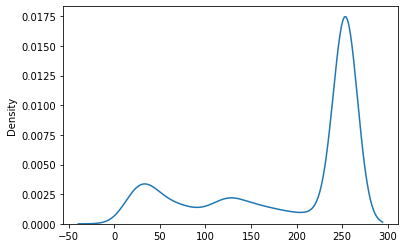

In [63]:
sns.kdeplot(test_image.reshape(64*64*3))